In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [155]:
song_all_info = pd.read_csv('../Data/selected_song_all_info.csv')
song_all_info.head(2)

,song id,곡 제목,가수,tag count,tag max,emotion max,곡 세부 장르 리스트,발매일,앨범 명,앨범 ID,...,좋아요수,어제순위,댓글1,댓글2,댓글3,댓글4,댓글5,1차 가공,2차 가공,3차 가공
0,1890,모든게 지나면,화랑,"{'뮤지컬': 1, '사랑': 1}","['뮤지컬', '사랑']","['경쾌한', '행복한']","['GN2902', 'GN1501', 'GN1507', 'GN2901']",20110621,뮤지컬 화랑 OST Vol.2,1315555,...,25,없음,없음,없음,없음,없음,없음,이 모든 것이 다 지나가고 또 시간이 흐르고 나면 그때는 모든 게 아무것도 아닌 일...,이 모든 것이 다 지나가고 또 시간이 흐르고 나면 그때는 모든 게 아무것도 아닌 일...,"['이', '모든', '것', '다', '지나가다', '또', '시간', '흐르다'..."
1,2491,You Brought A New Kind Of Love To Me,Ella Fitzgerald,"{'연말': 1, '새해': 1}","['연말', '새해']",['행복한'],['GN1701'],20180817,Ella Swings Lightly (Expanded Edition),5644325,...,1,없음,없음,없음,없음,없음,없음,없음,없음,['없다']


In [3]:
song_all_info_lyrics = song_all_info[song_all_info['2차 가공'] != '없음']

In [4]:
song_all_info_lyrics.shape

(704, 35)

In [61]:
#song_all_info_lyrics['emotion max']

In [67]:
new = pd.DataFrame(song_all_info_lyrics[['2차 가공', '곡 제목', '가수', 'tag max', 'emotion max']])
new

,2차 가공,곡 제목,가수,tag max,emotion max
0,이 모든 것이 다 지나가고 또 시간이 흐르고 나면 그때는 모든 게 아무것도 아닌 일...,모든게 지나면,화랑,"['뮤지컬', '사랑']","['경쾌한', '행복한']"
2,아직 열어보지 말아요 호기심이 생겨도 떨어트리 지도 말아요 그럼 나는 깨져버릴 테니...,마음 (*취급주의),러블리즈,['사랑'],['행복한']
4,너를 맘에 담고 나는 눈을 감고 우리의 추억을 떠올리며 살아 항상 행복했던 우리 기...,두달 뒤 부르는 노래,플라워디어 (Flour Deer),"['비오는날', '비', '슬픈', '집중', '여유', '카페', '새벽', '주...",['우울한']
5,흰 꽃은 밤에 아름답단 이유를 내게도 가르쳐줄 순 없소 이대로 날 잡아둘 뿐인지 흰...,비밀,캐스커,['이별'],['우울한']
6,나 기도할게 저 하늘에도 그대가 나의 기억 간직하도록 널 위해 불러 주었던 그 노래...,약속,KYT (코요태),"['추억', '회상']","['행복한', '잔잔한']"
...,...,...,...,...,...
1068,거짓말하고 당신의 걱정이 내려오지 않아서 너무 어리 석지 마십시오 나는 처음으로 미...,Brave,The Shires,"['새벽', '추억', '밤', '회상']","['우울한', '행복한', '무서운', '잔잔한']"
1071,홀로 카페의 문을 열어 본다 쓰디쓴 커피 한잔 시켜 본 다다 읽지 못할 책을 꺼내고...,허세가 (虛勢歌),주윤하,"['휴식', '봄']","['잔잔한', '행복한']"
1072,Oh shit 너무나도 너무나도 두리 뚱뚱한 너네 엄마 아무 잘못 없는 내가 뭐가 ...,"로얄패밀리 (Feat. Kirk, 김우근)",싸이 (PSY),['기분전환'],['행복한']
1073,네가 어떤 대학을 나왔는지 어떤 집안인지도 관심이 없어온 그렇게 자랑스러우면 얼굴에...,왕자님,야광토끼 (Neon Bunny),['기분전환'],['행복한']


In [69]:
new.reset_index(inplace=True, drop=False)
new.columns=['ori_index', 'lyrics', '곡 제목', '가수', 'tag max', 'emotion max']

In [7]:
###### 2번)
##### 다른거?
#https://stackoverflow.com/questions/50236117/scraping-ssl-certificate-verify-failed-error-for-http-en-wikipedia-org
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

import tensorflow as tf
import tensorflow_hub as hub

#embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
embedding = "https://tfhub.dev/google/nnlm-ko-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)

2021-11-28 20:57:14.119114: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(new, test_size=0.2, random_state=42)

In [27]:
train

,ori_index,lyrics
24,35,우리는 우리가 헛된 우리의 마음을 끈으로 묶어 으깨 였던 이유를 결코 묻지 못했던 ...
155,225,치키 티타 왜 그러니 이런 모습 난 처음 봐 내일이 바로 결혼식이잖아 그런 모습 보...
210,302,밤 하늘에 뜬 단 하루가 벌써 지나가 버렸다 검은 바탕에 외로이 앉아 good ni...
291,419,우리 헤어지지 말잡이 오는 거리에서 우리 헤어지지 말자이 가로등 아래서 이별을 앞둔...
537,809,웃으며 Cheese 한 번 더 Cheese you make me feel alive...
...,...,...
71,104,그 정도가 아니야 나는 그것의 모든 혼란을 통해 당신을 느끼는 것처럼 느끼는 것처럼...
106,162,겨울이 좋아질 것 같아어쩌면 또 몰라 겨울만 좋아할지도 사랑 참 신기한 거야 평범한...
270,389,뭐 이리 어려운 거야 너라는 사람 알기가 시도 때도 없이 생각나는데 생각대로 되질 ...
435,640,사람들은 모두 외롭다 식어가는 잔을 채우고 긴 한숨을 마신다 저 벽 높이 차오르게 ...


In [28]:
train_vector_lyrics = hub_layer(train['lyrics'])
valid_vector_lyrics = hub_layer(valid['lyrics'])

In [32]:
train_vector_lyrics[0]

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-0.38575208,  0.13894476, -0.51048946, -0.5660119 ,  0.8650372 ,
       -1.2982659 ,  0.8686245 , -0.9336936 ,  0.9582016 ,  0.8328271 ,
        0.1949564 ,  0.7880262 , -1.6883599 ,  0.87286496,  1.0300086 ,
       -0.1853584 ,  0.12123032,  0.8441994 ,  0.54047704,  0.6380026 ,
        0.37525362,  0.19262353,  0.18956172, -0.10614454,  0.14721797,
        0.23598696, -0.5518351 , -0.4450296 ,  0.42288256,  0.32856035,
       -0.16118158,  0.07314625,  1.7134608 ,  0.6161514 ,  0.09869399,
       -0.79756206, -0.4251305 ,  0.24934335,  0.21940616,  0.53022003,
       -0.44198054,  0.50174695, -0.57154644,  0.3219428 , -0.45558295,
       -0.45321372, -0.45003727,  0.05106086, -1.2369205 , -0.52143794],
      dtype=float32)>

In [112]:
##### 3번
#https://machinelearningmastery.com/autoencoder-for-classification/
# 직접 임베딩?한다면 어떻게?
# 옵티마이저, activation, loss 이렇게 하는게 맞는지?

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, BatchNormalization, Embedding
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

# define encoder
n = train_vector_lyrics[0].shape[0]
input_e = Input(shape=(n,))

# encoder level 1
e = Dense(16)(input_e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# bottleneck
#n_bottleneck = round(float(2) / 2.0)
bottleneck = Dense(2)(e)

# define decoder, level 1
d = Dense(16)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# decoder level 2
d = Dense(50)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# output layer
output = Dense(50)(d)

# define autoencoder model
model = Model(inputs=input_e, outputs=output)

# compile autoencoder model
model.compile(optimizer="adam", loss="mse")
#model.compile(optimizer='adam', loss='rmse')

# plot the autoencoder
#plot_model(model, 'autoencoder_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(train_vector_lyrics, train_vector_lyrics, epochs=50,
                    validation_data = (valid_vector_lyrics, valid_vector_lyrics),
                    batch_size=32, verbose=2)

Epoch 1/50
18/18 - 2s - loss: 0.6091 - val_loss: 0.3098 - 2s/epoch - 119ms/step
Epoch 2/50
18/18 - 0s - loss: 0.3166 - val_loss: 0.2757 - 97ms/epoch - 5ms/step
Epoch 3/50
18/18 - 0s - loss: 0.1966 - val_loss: 0.2388 - 93ms/epoch - 5ms/step
Epoch 4/50
18/18 - 0s - loss: 0.1395 - val_loss: 0.2032 - 95ms/epoch - 5ms/step
Epoch 5/50
18/18 - 0s - loss: 0.1165 - val_loss: 0.1745 - 88ms/epoch - 5ms/step
Epoch 6/50
18/18 - 0s - loss: 0.1012 - val_loss: 0.1497 - 79ms/epoch - 4ms/step
Epoch 7/50
18/18 - 0s - loss: 0.0934 - val_loss: 0.1373 - 85ms/epoch - 5ms/step
Epoch 8/50
18/18 - 0s - loss: 0.0908 - val_loss: 0.1265 - 91ms/epoch - 5ms/step
Epoch 9/50
18/18 - 0s - loss: 0.0918 - val_loss: 0.1157 - 84ms/epoch - 5ms/step
Epoch 10/50
18/18 - 0s - loss: 0.0858 - val_loss: 0.1115 - 81ms/epoch - 4ms/step
Epoch 11/50
18/18 - 0s - loss: 0.0840 - val_loss: 0.1060 - 83ms/epoch - 5ms/step
Epoch 12/50
18/18 - 0s - loss: 0.0816 - val_loss: 0.1026 - 87ms/epoch - 5ms/step
Epoch 13/50
18/18 - 0s - loss: 0.0824

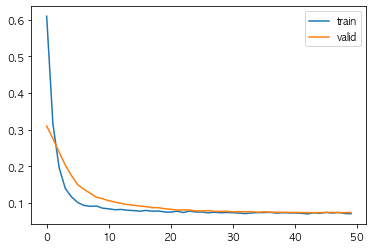

In [113]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='valid')
pyplot.legend()
pyplot.show()

In [114]:
#plot_model(model, 'autoencoder_compress.png', show_shapes=True)

In [140]:
# 인코더 모델 저장
encoder = Model(inputs=input_e, outputs=bottleneck)
#plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
#encoder.save('encoder.h5')

In [141]:
# encode the train data
vector_lyrics = hub_layer(new['lyrics'])
latent_variables = encoder.predict(vector_lyrics)
latent_variables.shape

(704, 2)

In [142]:
latent_x_y = pd.DataFrame(latent_variables)
latent_x_y.columns = ['x', 'y']
new_df = pd.concat([new, latent_x_y], axis=1)
new_df.head()

,ori_index,lyrics,곡 제목,가수,tag max,emotion max,x,y
0,0,이 모든 것이 다 지나가고 또 시간이 흐르고 나면 그때는 모든 게 아무것도 아닌 일...,모든게 지나면,화랑,"['뮤지컬', '사랑']","['경쾌한', '행복한']",2.505988,-0.282310
1,2,아직 열어보지 말아요 호기심이 생겨도 떨어트리 지도 말아요 그럼 나는 깨져버릴 테니...,마음 (*취급주의),러블리즈,['사랑'],['행복한'],0.059688,-1.811719
2,4,너를 맘에 담고 나는 눈을 감고 우리의 추억을 떠올리며 살아 항상 행복했던 우리 기...,두달 뒤 부르는 노래,플라워디어 (Flour Deer),"['비오는날', '비', '슬픈', '집중', '여유', '카페', '새벽', '주...",['우울한'],1.506145,-0.788881
3,5,흰 꽃은 밤에 아름답단 이유를 내게도 가르쳐줄 순 없소 이대로 날 잡아둘 뿐인지 흰...,비밀,캐스커,['이별'],['우울한'],1.425331,0.705875
4,6,나 기도할게 저 하늘에도 그대가 나의 기억 간직하도록 널 위해 불러 주었던 그 노래...,약속,KYT (코요태),"['추억', '회상']","['행복한', '잔잔한']",-0.427498,-0.813768


In [143]:
import plotly.express as px

fig = px.scatter(new_df, x="x", y="y",
                 #color="species", 
                 #size='petal_length',
                 hover_data=['곡 제목', '가수', 'tag max', 'emotion max'], # 참고할 데이터 추가
                 title='Autoencoder 차원축소' # 그래프 타이틀 지정
                )
fig.show()

# 유저 입장에서 테스트

In [144]:
# encode the train data
text = "너무 설레여. 하루하루가 기쁘고 행복해. 내일도 그 사람과 좋은 시간을 보내고 싶다."
test = hub_layer([text])
test_latent = encoder.predict(test)
test_latent

array([[3.0459127, 1.8552772]], dtype=float32)

In [145]:
#평가 방법 맞는지?
#코사인?
#from sklearn.metrics.pairwise import cosine_similarity
#cosine_similarity(tfidf_matrix, tfidf_matrix)
new_df["sim"] = 0
new_df["sim"] = new_df.apply(lambda x : abs(x['x']-test_latent[0][0])+abs(x['y']-test_latent[0][1]), axis=1)

In [146]:
#new_df.sort_values(by=['sim']).head(5)

In [154]:
new_df.sort_values(by=['sim']).head(1)['lyrics'].values

array(['샌프란시스코 모든 색상은 나의 일산 프란시스코에서 모든 색상을 보았습니다 모든 색상 모든 색상은 볼 스 캔 프란시스코 장밋빛 맛을 지킵니다 Blowingprima donnas와 Dancerslittle 형상이 당신이 당신을 탈출할 수 있습니다 요는 당신이 만날 때마다 당신이 느끼는 시간이 당신을 기분이 좋을 때마다 당신을 할 때마다 요요패션 프란시스코 모든 색상 보기 Backsan Francisco Rosy Flavors Blowingsan Francisco San Franciscosan Franciscovery Time Franciscoevery Time Flevery Time YoYo는 마다 기분이 좋을 때마다 당신을 만지는 시간이 당신을 기분이 좋을 때마다 당신을 기분이 좋을 때마다 당신을 기분이 좋을 때마다 당신이 느낄 때마다 당신이 느낄 때마다 당신이 느낄 때마다 당신이 느낄 때마다 당신은 할 수 있습니다'],
      dtype=object)

## 가사 + 태그 인풋

In [228]:
song_all_info_lyrics = song_all_info[song_all_info['2차 가공'] != '없음']
new2 = pd.DataFrame(song_all_info_lyrics[['2차 가공', '곡 제목', '가수', 'tag count', 'emotion max', '곡 장르 리스트', '대분류str']])
new2.reset_index(inplace=True, drop=False)
new2.columns=['ori_index', '2차 가공', '곡 제목', '가수', 'tag count', 'emotion max', '곡 장르 리스트', '대분류str']
new2.head(2)

,ori_index,2차 가공,곡 제목,가수,tag count,emotion max,곡 장르 리스트,대분류str
0,0,이 모든 것이 다 지나가고 또 시간이 흐르고 나면 그때는 모든 게 아무것도 아닌 일...,모든게 지나면,화랑,"{'뮤지컬': 1, '사랑': 1}","['경쾌한', '행복한']","['GN1500', 'GN2900']","GN1500,GN2900"
1,2,아직 열어보지 말아요 호기심이 생겨도 떨어트리 지도 말아요 그럼 나는 깨져버릴 테니...,마음 (*취급주의),러블리즈,"{'댄스': 8, '새해': 1, '헬스': 1, '운동할때': 1, '카페': 3...",['행복한'],"['GN2500', 'GN0200']","GN2500,GN0200"


In [229]:
import re
x = [', '.join(re.findall('[ㄱ-ㅣ가-힣]+', new2['tag count'][i])) for i in range(len(new2))]
new2['tag_ori'] = x
new2.head(2)

,ori_index,2차 가공,곡 제목,가수,tag count,emotion max,곡 장르 리스트,대분류str,tag_ori
0,0,이 모든 것이 다 지나가고 또 시간이 흐르고 나면 그때는 모든 게 아무것도 아닌 일...,모든게 지나면,화랑,"{'뮤지컬': 1, '사랑': 1}","['경쾌한', '행복한']","['GN1500', 'GN2900']","GN1500,GN2900","뮤지컬, 사랑"
1,2,아직 열어보지 말아요 호기심이 생겨도 떨어트리 지도 말아요 그럼 나는 깨져버릴 테니...,마음 (*취급주의),러블리즈,"{'댄스': 8, '새해': 1, '헬스': 1, '운동할때': 1, '카페': 3...",['행복한'],"['GN2500', 'GN0200']","GN2500,GN0200","댄스, 새해, 헬스, 운동할때, 카페, 드라이브, 신나는, 비오는날, 기분전환, 봄..."


In [201]:
###### 2번)
##### 다른거?
#https://stackoverflow.com/questions/50236117/scraping-ssl-certificate-verify-failed-error-for-http-en-wikipedia-org
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

import tensorflow as tf
import tensorflow_hub as hub

#embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
embedding = "https://tfhub.dev/google/nnlm-ko-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)

In [230]:
from sklearn.model_selection import train_test_split

train2, valid2 = train_test_split(new2, test_size=0.2, random_state=42)

In [218]:
# 비교?
hub_layer(["뮤지컬 사랑"])
hub_layer(["뮤지컬, 사랑"])

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[-0.30936667,  0.06280302,  0.00174486,  0.05147527,  0.03669044,
        -0.0134164 ,  0.08090814, -0.24867363, -0.12495212,  0.05267698,
         0.14914712, -0.2575595 ,  0.08666311, -0.03057443,  0.04137168,
        -0.23981135, -0.12328179, -0.01761021, -0.22883159,  0.13054886,
         0.08539107, -0.12396754, -0.2874161 , -0.33369178, -0.09018499,
        -0.0303982 ,  0.00287409,  0.0425838 ,  0.27371073, -0.10827183,
         0.1454306 , -0.55886024, -0.2439737 , -0.33957133,  0.0164256 ,
        -0.06252721, -0.01548598,  0.05402949,  0.09065595, -0.09944707,
        -0.09566302,  0.12737915,  0.2271367 ,  0.07367342,  0.09502465,
         0.06077551,  0.03460057,  0.08175665, -0.32409123,  0.15551472]],
      dtype=float32)>

In [232]:
train_vector_lyrics2 = hub_layer(train2['2차 가공'])
valid_vector_lyrics2 = hub_layer(valid2['2차 가공'])

train_vector_tag2 = hub_layer(train2['tag_ori'])
valid_vector_tag2 = hub_layer(valid2['tag_ori'])

In [237]:
##### 3번
#https://stackoverflow.com/questions/52435274/how-to-use-keras-merge-layer-for-autoencoder-with-two-ouput
# 직접 임베딩?한다면 어떻게?
# 옵티마이저, activation, loss 이렇게 하는게 맞는지? (아까와 다름..)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, BatchNormalization, Concatenate
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

Xinput = Input(shape=(50,))
Yinput = Input(shape=(50,))

Xencoded = Dense(24, activation='relu')(Xinput)
Xencoded = Dense(8, activation='relu')(Xencoded)


Yencoded = Dense(24, activation='relu')(Yinput)
Yencoded = Dense(8, activation='relu')(Yencoded)

shared_input = Concatenate()([Xencoded, Yencoded])
shared_output = Dense(2, activation='relu')(shared_input)

Xdecoded = Dense(8, activation='relu')(shared_output)
Xdecoded = Dense(24, activation='relu')(Xdecoded)
Xdecoded = Dense(50, activation='relu')(Xdecoded)

Ydecoded = Dense(8, activation='relu')(shared_output)
Ydecoded = Dense(24, activation='relu')(Ydecoded)
Ydecoded = Dense(50, activation='relu')(Ydecoded)

# define autoencoder model and compile
model2 = Model(inputs=[Xinput, Yinput], outputs=[Xdecoded, Ydecoded])
model2.compile(optimizer='adam', loss=['mse', 'mse'], loss_weights=[1., 1.])

# plot the autoencoder
#plot_model(model, 'autoencoder_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history2 = model2.fit([train_vector_lyrics2, train_vector_tag2], [train_vector_lyrics2, train_vector_tag2],
                    validation_data = ([valid_vector_lyrics2, valid_vector_tag2], [valid_vector_lyrics2, valid_vector_tag2]),
                    epochs = 50, batch_size = 32, verbose=2)

Epoch 1/50
18/18 - 1s - loss: 0.3283 - dense_64_loss: 0.3053 - dense_67_loss: 0.0229 - val_loss: 0.3480 - val_dense_64_loss: 0.3253 - val_dense_67_loss: 0.0227 - 1s/epoch - 80ms/step
Epoch 2/50
18/18 - 0s - loss: 0.3136 - dense_64_loss: 0.2917 - dense_67_loss: 0.0219 - val_loss: 0.3266 - val_dense_64_loss: 0.3035 - val_dense_67_loss: 0.0231 - 77ms/epoch - 4ms/step
Epoch 3/50
18/18 - 0s - loss: 0.2875 - dense_64_loss: 0.2654 - dense_67_loss: 0.0221 - val_loss: 0.2937 - val_dense_64_loss: 0.2711 - val_dense_67_loss: 0.0226 - 76ms/epoch - 4ms/step
Epoch 4/50
18/18 - 0s - loss: 0.2674 - dense_64_loss: 0.2464 - dense_67_loss: 0.0210 - val_loss: 0.2841 - val_dense_64_loss: 0.2627 - val_dense_67_loss: 0.0214 - 86ms/epoch - 5ms/step
Epoch 5/50
18/18 - 0s - loss: 0.2616 - dense_64_loss: 0.2410 - dense_67_loss: 0.0206 - val_loss: 0.2803 - val_dense_64_loss: 0.2590 - val_dense_67_loss: 0.0213 - 97ms/epoch - 5ms/step
Epoch 6/50
18/18 - 0s - loss: 0.2593 - dense_64_loss: 0.2388 - dense_67_loss: 0.0

Epoch 46/50
18/18 - 0s - loss: 0.2381 - dense_64_loss: 0.2177 - dense_67_loss: 0.0204 - val_loss: 0.2587 - val_dense_64_loss: 0.2375 - val_dense_67_loss: 0.0212 - 100ms/epoch - 6ms/step
Epoch 47/50
18/18 - 0s - loss: 0.2380 - dense_64_loss: 0.2176 - dense_67_loss: 0.0204 - val_loss: 0.2587 - val_dense_64_loss: 0.2375 - val_dense_67_loss: 0.0212 - 94ms/epoch - 5ms/step
Epoch 48/50
18/18 - 0s - loss: 0.2379 - dense_64_loss: 0.2176 - dense_67_loss: 0.0204 - val_loss: 0.2587 - val_dense_64_loss: 0.2375 - val_dense_67_loss: 0.0213 - 108ms/epoch - 6ms/step
Epoch 49/50
18/18 - 0s - loss: 0.2379 - dense_64_loss: 0.2176 - dense_67_loss: 0.0204 - val_loss: 0.2588 - val_dense_64_loss: 0.2375 - val_dense_67_loss: 0.0212 - 117ms/epoch - 6ms/step
Epoch 50/50
18/18 - 0s - loss: 0.2379 - dense_64_loss: 0.2175 - dense_67_loss: 0.0204 - val_loss: 0.2587 - val_dense_64_loss: 0.2374 - val_dense_67_loss: 0.0213 - 103ms/epoch - 6ms/step


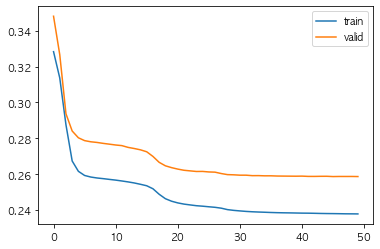

In [238]:
# plot loss
pyplot.plot(history2.history['loss'], label='train')
pyplot.plot(history2.history['val_loss'], label='valid')
pyplot.legend()
pyplot.show()

In [249]:
# 인코더 모델 저장
encoder2 = Model(inputs=[Xinput, Yinput], outputs=shared_output)
#plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
#encoder.save('encoder.h5')

In [242]:
# encode the train data
vector_lyrics = hub_layer(new2['2차 가공'])
vector_tags = hub_layer(new2['tag_ori'])
latent_variables2 = encoder.predict([vector_lyrics, vector_tags])
latent_variables2.shape

(704, 2)

In [244]:
latent_x_y2 = pd.DataFrame(latent_variables2)
latent_x_y2.columns = ['x', 'y']
new_df2 = pd.concat([new2, latent_x_y2], axis=1)
new_df2.head()

,ori_index,2차 가공,곡 제목,가수,tag count,emotion max,곡 장르 리스트,대분류str,tag_ori,x,y
0,0,이 모든 것이 다 지나가고 또 시간이 흐르고 나면 그때는 모든 게 아무것도 아닌 일...,모든게 지나면,화랑,"{'뮤지컬': 1, '사랑': 1}","['경쾌한', '행복한']","['GN1500', 'GN2900']","GN1500,GN2900","뮤지컬, 사랑",0.341554,0.668134
1,2,아직 열어보지 말아요 호기심이 생겨도 떨어트리 지도 말아요 그럼 나는 깨져버릴 테니...,마음 (*취급주의),러블리즈,"{'댄스': 8, '새해': 1, '헬스': 1, '운동할때': 1, '카페': 3...",['행복한'],"['GN2500', 'GN0200']","GN2500,GN0200","댄스, 새해, 헬스, 운동할때, 카페, 드라이브, 신나는, 비오는날, 기분전환, 봄...",1.845627,1.469765
2,4,너를 맘에 담고 나는 눈을 감고 우리의 추억을 떠올리며 살아 항상 행복했던 우리 기...,두달 뒤 부르는 노래,플라워디어 (Flour Deer),"{'비오는날': 1, '비': 1, '슬픈': 1, '집중': 1, '여유': 1,...",['우울한'],['GN0800'],GN1400,"비오는날, 비, 슬픈, 집중, 여유, 카페, 새벽, 주말, 힐링, 작업, 밤",1.126274,1.386065
3,5,흰 꽃은 밤에 아름답단 이유를 내게도 가르쳐줄 순 없소 이대로 날 잡아둘 뿐인지 흰...,비밀,캐스커,"{'이별': 2, '슬픔': 1, '설렘': 1, '사랑': 1}",['우울한'],"['GN0500', 'GN2600']","GN0500,GN1100","이별, 슬픔, 설렘, 사랑",0.774167,0.854337
4,6,나 기도할게 저 하늘에도 그대가 나의 기억 간직하도록 널 위해 불러 주었던 그 노래...,약속,KYT (코요태),"{'슬픔': 1, '추억': 2, '이별': 1, '회상': 2, '기분전환': 1}","['행복한', '잔잔한']",['GN0100'],GN0100,"슬픔, 추억, 이별, 회상, 기분전환",1.961346,1.639760


In [247]:
import plotly.express as px

fig = px.scatter(new_df2, x="x", y="y",
                 #color="species", 
                 #size='petal_length',
                 hover_data=['곡 제목', '가수', 'tag_ori', 'emotion max'], # 참고할 데이터 추가
                 title='Autoencoder 차원축소' # 그래프 타이틀 지정
                )
fig.show()

In [256]:
# encode the train data
text = "너무 설레여. 하루하루가 기쁘고 행복해. 내일도 그 사람과 좋은 시간을 보내고 싶다."
input_tag = "사랑, 설렘" #듣고 싶은 노래 유형 #근데 스웩, 힙합하면 없음.
test = hub_layer([text])
input_tag_test = hub_layer([input_tag])
test_latent = encoder2.predict([test, input_tag_test])
test_latent

array([[0.1229341 , 0.00320996]], dtype=float32)

In [263]:
# encode the train data
text = "너무 설레여. 하루하루가 기쁘고 행복해. 내일도 그 사람과 좋은 시간을 보내고 싶다."
input_tag = "설렘, 사랑" #듣고 싶은 노래 유형 #근데 스웩, 힙합하면 없음.
test = hub_layer([text])
input_tag_test = hub_layer([input_tag])
test_latent = encoder2.predict([test, input_tag_test])
test_latent

array([[0.12242343, 0.05095541]], dtype=float32)

In [258]:
#평가 방법 맞는지?
#코사인?
#from sklearn.metrics.pairwise import cosine_similarity
#cosine_similarity(tfidf_matrix, tfidf_matrix)
new_df2["sim"] = 0
new_df2["sim"] = new_df2.apply(lambda x : abs(x['x']-test_latent[0][0])+abs(x['y']-test_latent[0][1]), axis=1)
new_df2.sort_values(by=['sim']).head()

####결과 별로인듯?

,ori_index,2차 가공,곡 제목,가수,tag count,emotion max,곡 장르 리스트,대분류str,tag_ori,x,y,sim
362,529,바지는 벌써 젖어버렸네 우산을 받쳐도 몰아치네 불어난 한강물엔 돼지들 한때의 굶주렸...,눈치도 없이,더 문샤이너스,"{'스트레스': 1, '설렘': 1, '사랑': 1}",['행복한'],"['GN0500', 'GN0600']","GN0500,GN0600","스트레스, 설렘, 사랑",0.041157,0.0,0.084987
163,240,어떻게 만들었을까 어떻게 만들었을까 대한민국 숭례문 프랑스 에펠탑 중국의 만리장성 ...,어떻게든,Various Artists,{'뮤지컬': 1},['경쾌한'],"['GN1500', 'GN2900']","GN1500,GN2900",뮤지컬,0.240171,0.0,0.120447
9,13,바람이 불어오잖아 바람이 불어오면 나는 기타를 들고 노래할 거야 사람들 스쳐지나고 ...,거리에서,뮤지컬 웨잇포유 (Musical Wait For You),"{'감동': 1, '뮤지컬': 1}","['행복한', '경쾌한']","['GN1500', 'GN2900']","GN1500,GN2900","감동, 뮤지컬",0.000000,0.0,0.126144
117,174,우박 Mary Full Pleuraudius Grace Pernoavéréde O ...,Ave Maria,Michael Buble,"{'겨울': 1, '설렘': 1, '사랑': 1, '까페': 1}","['잔잔한', '행복한']",['GN0900'],GN0900,"겨울, 설렘, 사랑, 까페",0.000000,0.0,0.126144
87,133,우리의 사랑은 애호가가 꿈꾸는 땅이 있습니다 우리는 내일 항해할 수 있습니다 항상...,Our Love,Al Jarreau,{'겨울감성': 1},['잔잔한'],['GN1700'],GN1700,겨울감성,0.000000,0.0,0.126144


## +글에서 자주 나온 단어...most common top5를 태그로?

## +본인이 자주 들었던 노래 3개를 고르면, 그 3개와 어울리는 분위기